#Introdução


Este notebook tem como objetivo explorar o uso do framework Agno integrado ao modelo Groq-Llama, combinando três elementos principais:

 - Coleta de dados via scrapping
 - Processamento ou tratamento dos dados coletados


#Agno - Como funciona


A classe Agent recebe os seguintes parâmetros:

 - model: Define qual IA será utilizada
 - tools: Lista de ferramentas, internas ou externas, para o Agent utilizar
 - instructions: Instruções a serem passadas ao modelo de IA


 Nesse estudo, a ferramenta fornecida ao Agent foi uma função python que realiza um web scraping em uma URL fornecida.



#AgenteIA

In [ ]:
from IPython.display import Markdown, display
from agno.agent import Agent
from agno.models.groq import Groq
from agno.tools import tool
import requests
from bs4 import BeautifulSoup
from typing import List, Optional, Dict, Union


@tool
def scrape_tag(
    url: str,
    tag: Optional[str] = None,
    selector: Optional[str] = None,
    attrs: Optional[Dict[str, str]] = None,
    find_all: bool = True,
    text_only: bool = True,
    timeout: int = 10,
    headers: Optional[Dict[str, str]] = None
) -> Union[List[str], List[BeautifulSoup], None]:
    """
    Faz scraping de uma página e retorna o(s) conteúdo(s) da(s) tag(s) encontrada(s).

    Parâmetros:
    - url: URL da página.
    - tag: nome da tag HTML a buscar (ex: 'h1', 'p', 'a'). Se 'selector' for passado, 'tag' é ignorado.
    - selector: seletor CSS (ex: 'div.post > h2', '.header a'). Se fornecido, tem prioridade.
    - attrs: dicionário de atributos para filtrar (ex: {'class': 'intro'}).
    - find_all: True para retornar todas as ocorrências; False para retornar apenas a primeira.
    - text_only: True para retornar somente o texto .strip() de cada tag; False para retornar o HTML da tag (`str(element)`).
    - timeout: tempo máximo de espera para a requisição (segundos).
    - headers: cabeçalhos HTTP customizados (ex: {'User-Agent': 'meu-bot/1.0'}). Se None, usa um default razoável.

    Retorna:
    - Lista de textos ou HTML das tags encontradas, ou None em caso de erro.
    """
    import requests
    from bs4 import BeautifulSoup


    if headers is None:
        headers = {
            "User-Agent": "Mozilla/5.0 (compatible; ScraperBot/1.0; +https://example.com/bot)"
        }

    try:
        resp = requests.get(url, headers=headers, timeout=timeout)
        resp.raise_for_status()
    except requests.RequestException as e:
        print(f"[ERRO] Requisição falhou: {e}")
        return None

    soup = BeautifulSoup(resp.text, "html.parser")

    elements = []
    if selector:
        # usar seletor CSS
        try:
            if find_all:
                elements = soup.select(selector)
            else:
                el = soup.select_one(selector)
                elements = [el] if el is not None else []
        except Exception as e:
            print(f"[ERRO] seletor CSS inválido ou falha no parsing: {e}")
            return None
    else:
        # usar tag + attrs
        try:
            if tag is None:
                print("[ERRO] informe 'tag' ou 'selector'.")
                return None
            if find_all:
                elements = soup.find_all(tag, attrs=attrs)
            else:
                el = soup.find(tag, attrs=attrs)
                elements = [el] if el is not None else []
        except Exception as e:
            print(f"[ERRO] falha ao buscar tags: {e}")
            return None

    # transformar em texto ou html
    results = []
    for el in elements:
        if el is None:
            continue
        if text_only:
            text = el.get_text(separator=" ", strip=True)
            results.append(text)
        else:
            results.append(str(el))

    return results

agent = Agent(
    model=Groq(
        id="llama-3.3-70b-versatile",
        max_tokens=4096,
        api_key="API_KEY",
        instructions='Não traduzir e retornar uma tabela com os resultados'
    ),
    tools=[scrape_tag],
    markdown=True
)



result = agent.run(
    "Faça um scrap da tag <p> na página 'https://www.bbc.com/sport/cycling/articles/cgmzlp8gg2yo' e imprima os resultados."
)
display(Markdown(result.content))

Os resultados do scraping da tag `<p>` na página 'https://www.bbc.com/sport/cycling/articles/cgmzlp8gg2yo' são:
* Pogacar is firmly in the debate for the greatest rider of all time along side Belgian legend Eddy Merckx
* Tadej Pogacar won the men's road race at the UCI Road World Championships for the second year in a row with a dominant performance that left his rivals trailing.
* Four-time Tour de France winner Pogacar, 27, crossed the line in Rwanda to claim the winner's rainbow jersey one minute 28 seconds clear of Remco Evenepoel of Belgium.
* The Republic of Ireland's Ben Healy took a superb third place, with Britain's Tom Pidcock in 10th - nine minutes five seconds down on Pogacar.
* Pidcock was part of a spirited four-man attempt to chase down the Slovenian, who was on his own with still 70 kilometres to go on the 267.5km course, consisting of laps around Kigali.
* Thousands of local fans flanked the roads around Rwanda's capital city for the culmination of the week-long road championships, which were held in Africa for the first time.
* "I was left alone quite early and going solo like last year and fighting myself, so I was happy I made it," said Pogacar afterwards.
* "The laps were getting harder and harder and downhills were not so fast, so you still have to pedal a lot, so [my] energy resources were going towards the end.
* "It was so hard in the few final laps... first you doubt a bit, but you have to push through. It was an incredible experience and a successful week."
* Rwanda hosts UCI World Championships: What could it do for cycling in Africa?
* Pogacar's masterful performance was a study in endurance and strategic efforts, rather than the more typical explosive riding he often employs in one-day races.
* Around a hilly course which consisted of more than 5,000 metres of climbing - the equivalent of one of the Tour de France's most demanding stages - he rode away  from the peloton over Mount Kigali with 100 kilometres to go in the company of two of his UAE-Team Emirates trade team-mates.
* But Juan Ayuso of Spain was soon dropped, followed about 30 kilometres later by young Mexican Isaac del Toro, to leave the defending world champion in imperious isolation.
* Pogacar held a gap of just over a minute to the four remaining chasers - Pidcock, Evenepoel, Healy and Denmark's Mattias Skjelmose - for more than an hour, applying more power on the punishing, cobbled Cote du Kimihurura climb than his rivals.
* Pogacar has come to dominate men's cycling across the past three seasons, frequently winning the sport's biggest one-day races by more than a minute and three-week Grand Tours by more than five minutes.
* Pogacar has won eight of the 13 races he has contested this season but showed uncharacteristic weakness last weekend as he only came fourth in the World Championships Time Trial, with the champion Evenepoel even passing him on the road, despite two-minute staggered starts.
* Pogacar insisted he had not been able to prepare for the time trial because of travel demands and time constraints, but any hope his competitors had that he was tired towards the end of a gruelling season were dismissed on Sunday as he secured his second world road title in the manner only he can.
* In 26C heat, it was the final cobbled climb on the circuit which put paid to the hopes of Pidcock, who finished third at the recent Vuelta a Espana.
* Pidcock, 26, had told BBC Sport success could breed success in Kigali, but despite his eight-man Great Britain team delivering him to the front of the race at the crucial moment, he finally ran out of energy with about 40km to go.
* "That was the most unenjoyable race of the yearâ it was so bad," said Pidcock.
* "I didn't feel so good at the start, then I started coming around in the race, but then just completely blew up, then survival to finish - not much more to say. Absolutely brutal.
* "When five of us went away behind Tadej, at one point I thought anything is possible â then my legs fell off."
* It was an eventful day for double Olympic champion Evenepoel, who had to change his bike more than once during the race, which caused the often animated rider to kick the ground and shout at his team car in frustration.
* Healy topped a superb season in which he also won a stage of this year's Tour de France, as well as a stint wearing the leader's yellow jersey.
* The 25-year-old is the first Irishman to make the podium since Sean Kelly took third in 1989, while Stephen Roche won the event in 1987.
* Canada's Magdeleine Vallieres won the women's elite road race on Saturday, finishing 23 seconds ahead of Niamh Fisher-Black of New Zealand and 27 ahead of Mavi Garcia of Spain.
* It was an unexpected title for the EF Education-Oatly rider, with several favourites, such as Demi Vollering of the Netherlands and Pauline Ferrand-Prevot of France, more than one minute behind.
* 1. Tadej Pogacar (Slo) 6hrs 21mins 20secs
* 2. Remco Evenepoel (Bel) +1min 28secs
* 3. Ben Healy (Ire) +2min 16secs
* 4. Mattias Skjelmose (Den) +2min 53secs
* 5. Tom Skujins (Lat) +6min 41secs
* 6. Giulio Ciccone (Ita) +6min 47secs
* 7. Isaac del Toro (Mex) same time
* 8. Juan Ayuso (Spa)
* 9. Afonso Eulalio (Por) +7min 6secs
* 10. Tom Pidcock (GB) +9min 5secs

#POC - Validação do resultado


Para avaliar os resultados do Agent desenvolvido, enviei uma captura de tela com os resultados do framework ao lado da página utilizada no scrap

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


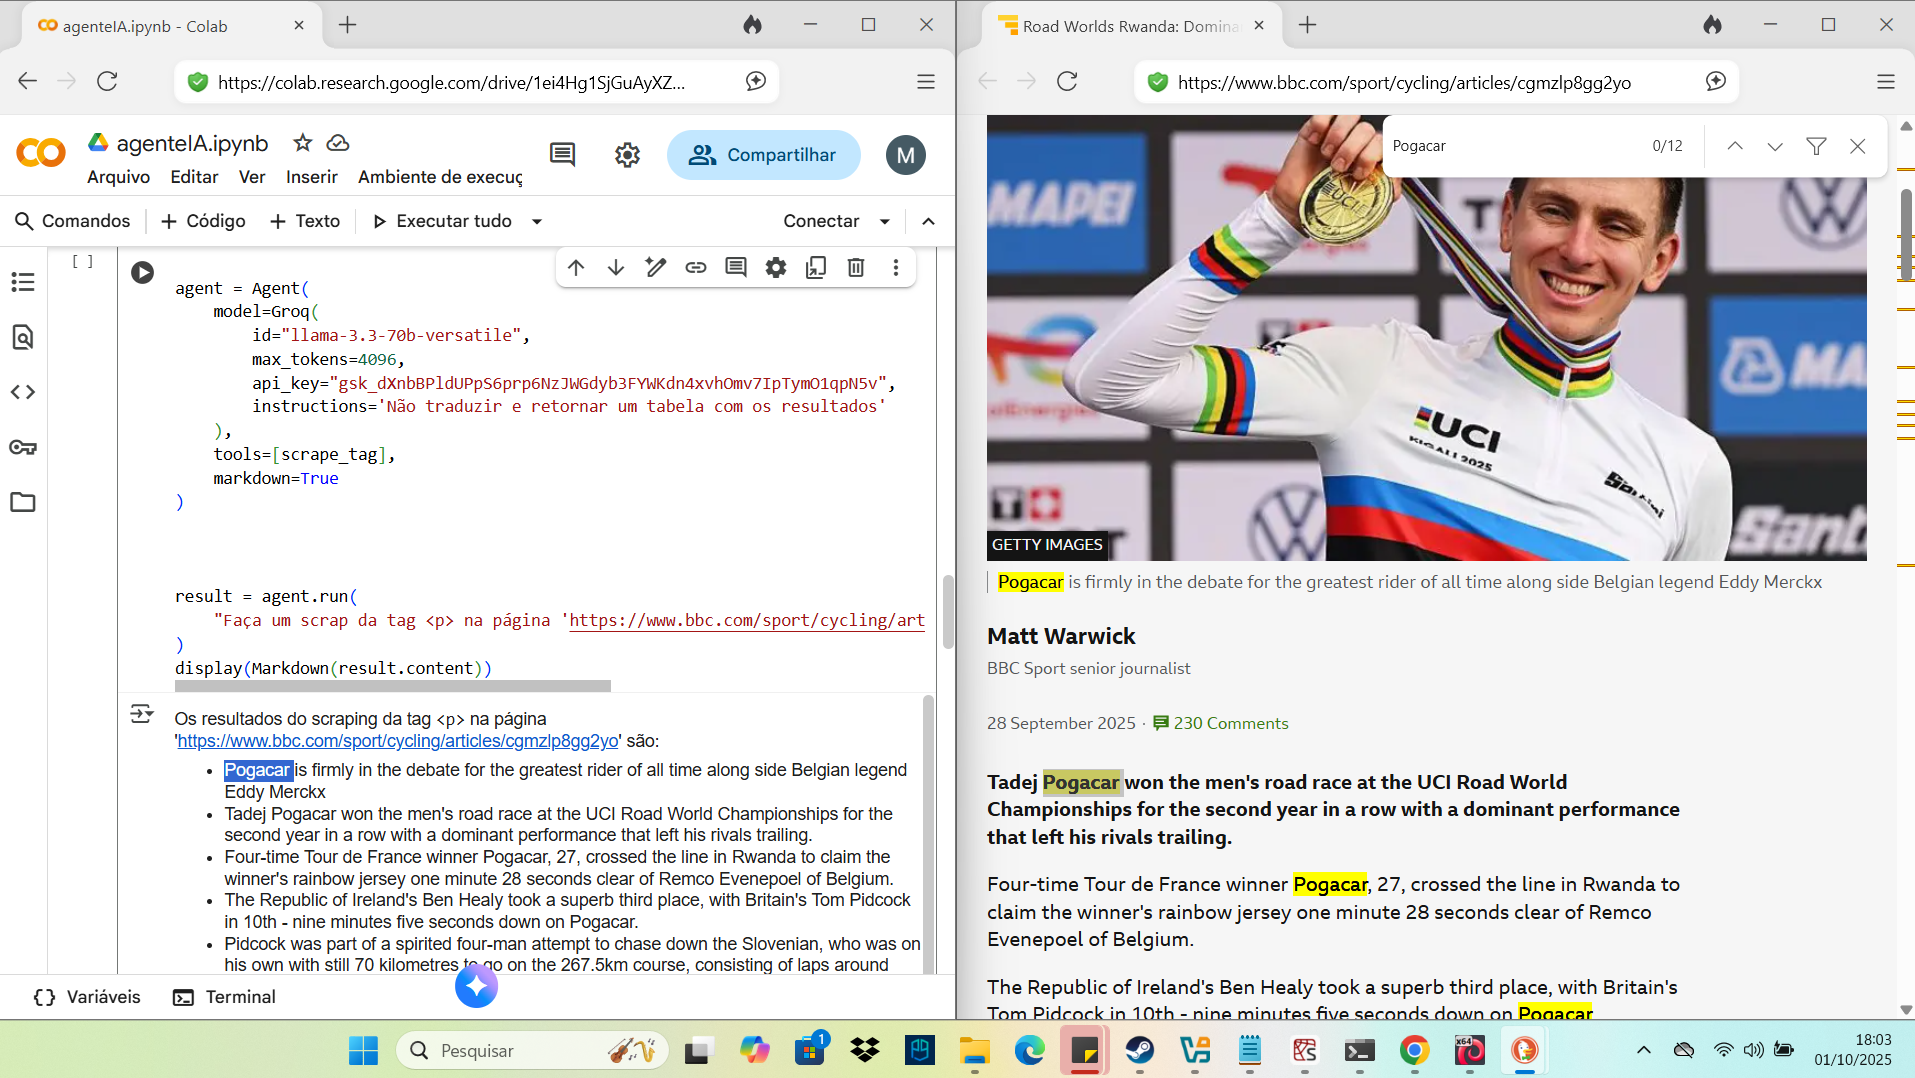

In [7]:
from google.colab import drive
from PIL import Image
from IPython.display import display


drive.mount('/content/drive')


display(Image.open('/content/drive/MyDrive/poc.png'))